**genetIC CAMB Python example notebook**

In [1]:
#In order to install camb using anaconda, the following steps worked for us:
#1. install anaconda and activate it. On macOS this requires the use of a bash shell 
#   (note that the latest macOS does not use bash as default in Terminal)
#2. camb's conda installation can be brittle on some systems so create a clean environment using:
#   conda create -n mypy37camb -c conda-forge python=3.7 scipy pandas matplotlib jupyter 
#   conda activate mypy37camb 
#   conda install -c conda-forge camb=VERSION (this should be set to the latest version at the time of installation)
#   jupyter notebook
#3. open this notebook
#Acknowledgements: this notebook is based on the demo at https://camb.readthedocs.io/en/latest/CAMBdemo.html
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower

In [2]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.8], kmax=10.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)


Note: redshifts have been re-sorted (earliest first)


In [3]:
print(results.get_sigma8())

[0.53316735 0.80278595]


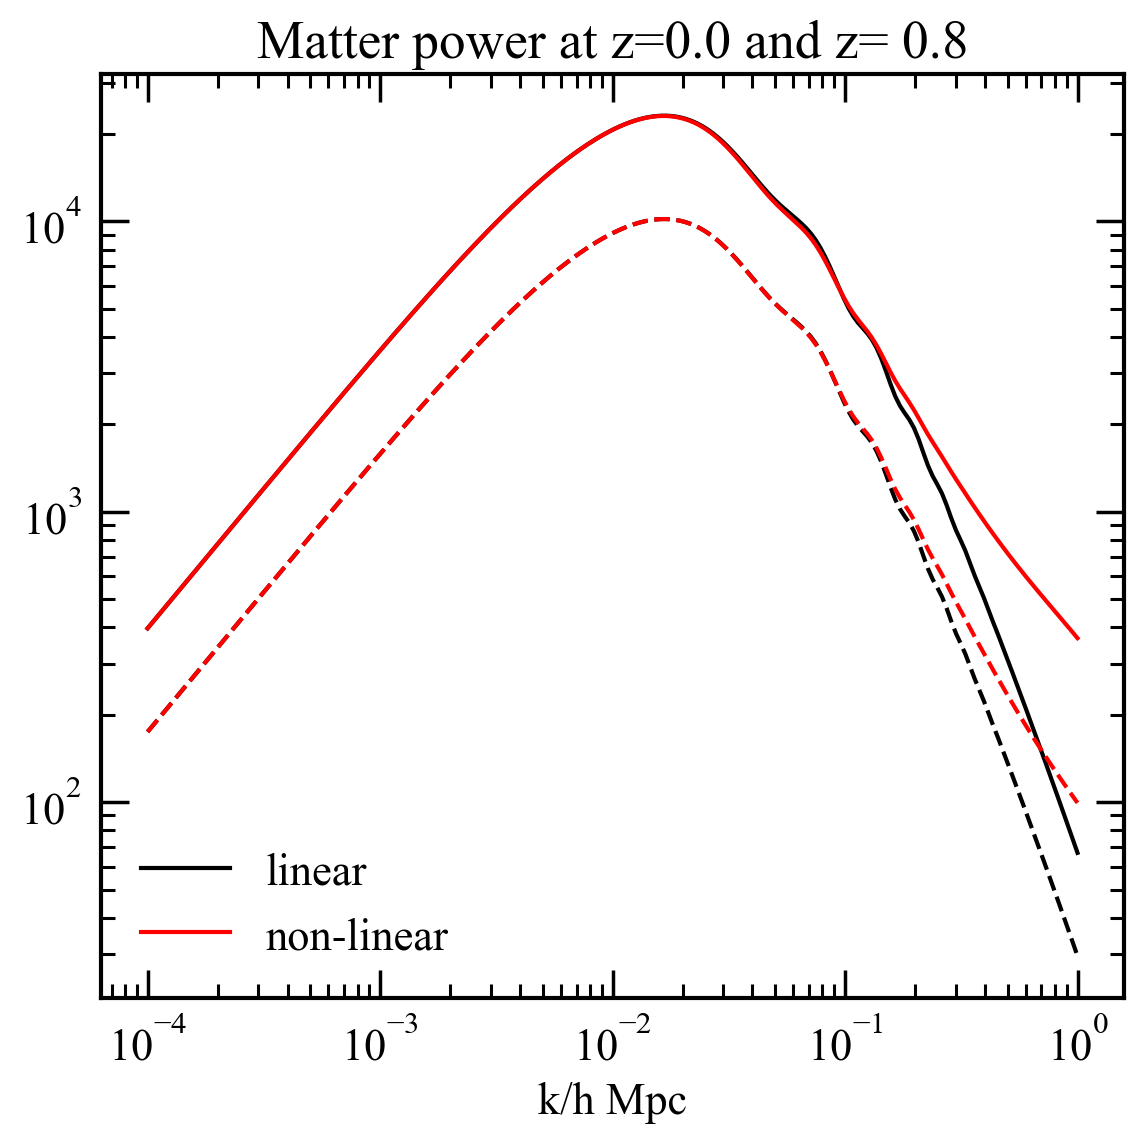

In [4]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));

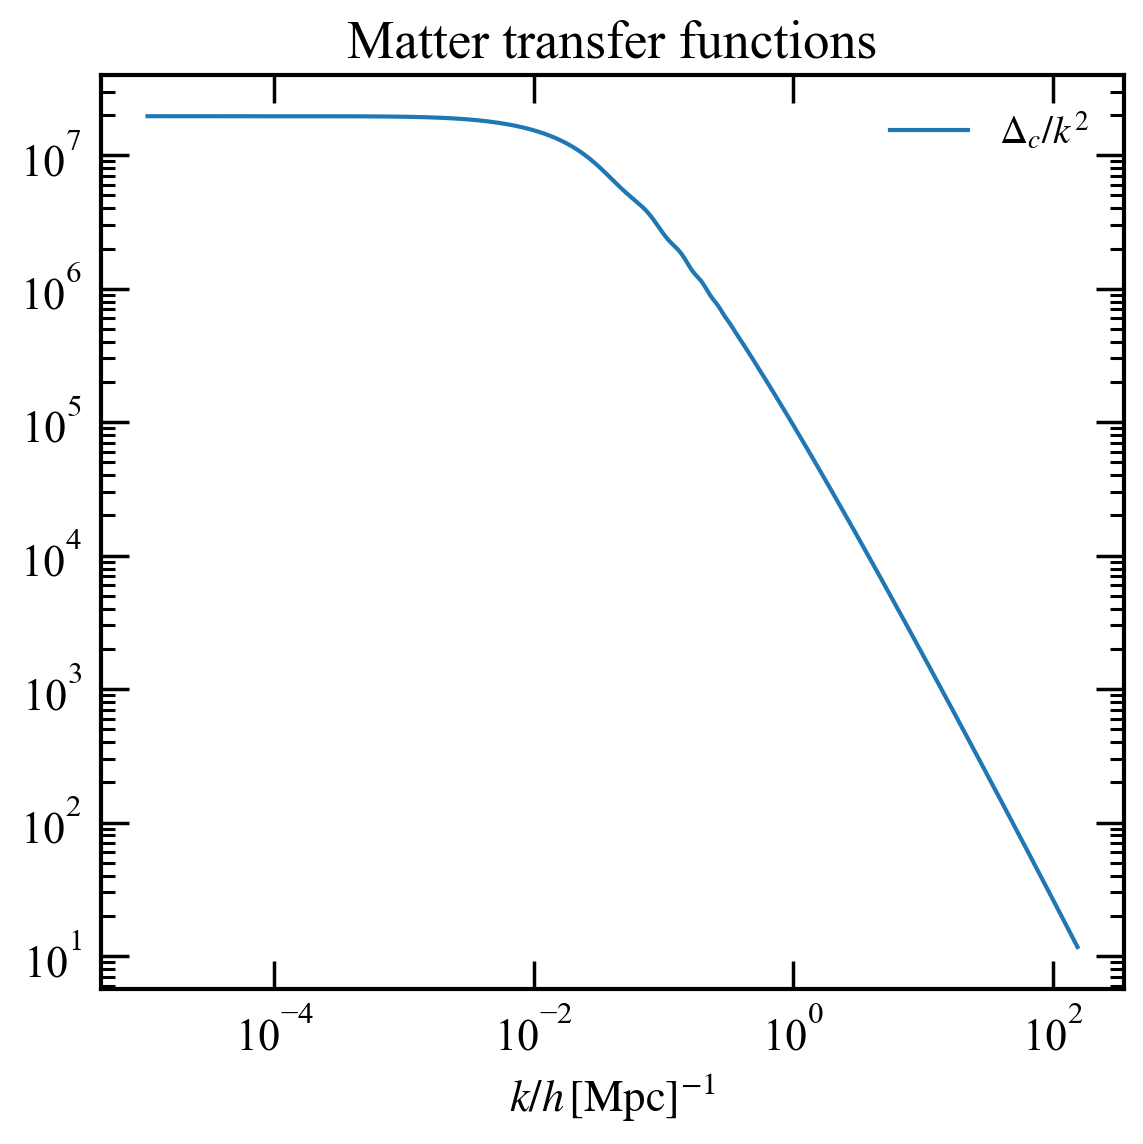

In [5]:
#You can also get the matter transfer functions
#These are synchronous gauge and normalized to unit primordial curvature perturbation
#The values stored in the array are quantities like Delta_x/k^2, and hence
#are nearly independent of k on large scales. 
#Indices in the transfer_data array are the variable type, the k index, and the redshift index

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
kmax=100
pars.set_matter_power(redshifts=[0], kmax=kmax)
results= camb.get_results(pars)

trans = results.get_matter_transfer_data()
#get kh - the values of k/h at which they are calculated
kh = trans.transfer_data[0,:,0]
#transfer functions for different variables, e.g. CDM density 
delta = trans.transfer_data[model.Transfer_cdm-1,:,0]
plt.loglog(kh,delta)
plt.xlabel(r'$k/h\, [\rm Mpc]^{-1}$', fontsize=16);
plt.title('Matter transfer functions')
plt.legend([r'$\Delta_c/k^2$'], fontsize=14);

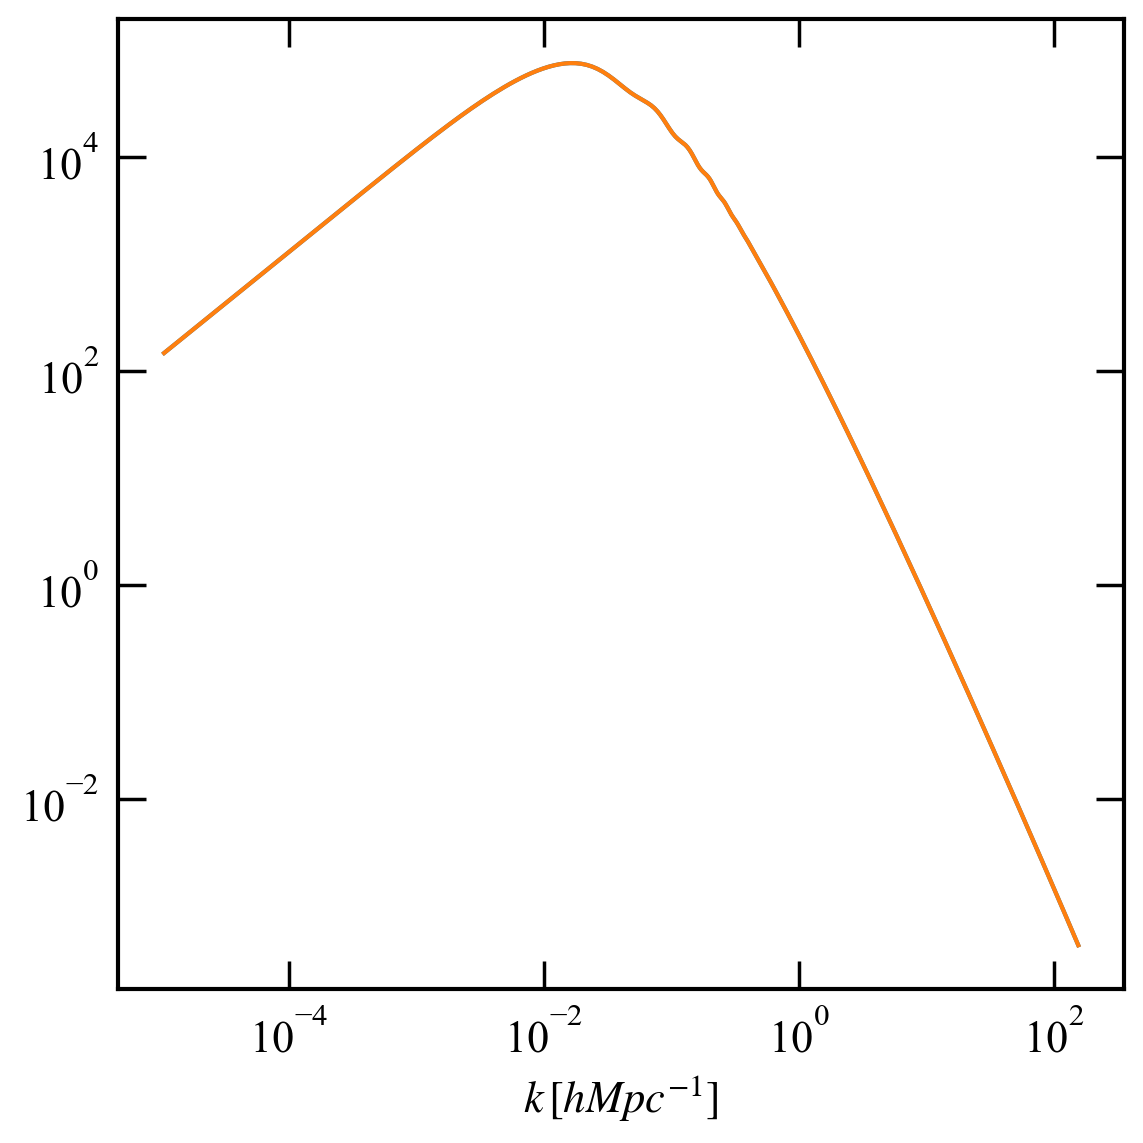

In [6]:
#Check we can get the matter power spectrum from the transfer function as expected
k = kh*results.Params.h
transfer = trans.transfer_data[model.Transfer_tot-1,:,0]
primordial_PK = results.Params.scalar_power(k)
matter_power = primordial_PK*transfer**2*k**4 / (k**3/(2*np.pi**2))

#compare with CAMB's explicit output for the matter power spectrum
kh2,zs,PK = results.get_linear_matter_power_spectrum(hubble_units=False)

plt.loglog(kh,matter_power)
plt.loglog(kh, PK[0,:]);
plt.xlabel(r'$k\, [h Mpc^{-1}]$');

In [7]:
#Produce the matter power spectrum and transfer functions for the Planck 2018 cosmology
camb.run_ini('planck_2018.ini')

at z =  0.000 sigma8 (all matter) =  0.8117
at z =  0.000 sigma8^2_vd/sigma8  =  0.4292


In [8]:
#read in an instance of the Planck 2018 cosmology from the ini file
pars = camb.read_ini('planck_2018.ini')
results = camb.get_results(pars)

In [9]:
#Print out the sigma8 corresponding to the Planck 2018 cosmology
print(results.get_sigma8())
sigma8=results.get_sigma8()
f = open("planck_2018_s8.txt", "w")
f.write(str(sigma8[0]))
f.close()

[0.81172073]
